<a href="https://colab.research.google.com/github/greenkg24/data-analytics-journey/blob/main/DataPreparation_BankMarketingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving bank_marketing_training.csv to bank_marketing_training.csv


In [5]:
import io

bank_marketing_training = pd.read_csv(io.BytesIO(uploaded['bank_marketing_training.csv']), sep=",")

In [6]:
bank_marketing_training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [7]:
# derive an index field and add to data set
bank_marketing_training['index'] = pd.Series(range(0, bank_marketing_training.shape[0]))

In [8]:
import numpy as np

In [10]:
# change field value 999 to np.NAN (999 is code for missing by DBAs)
bank_marketing_training['days_since_previous'] = bank_marketing_training['days_since_previous'].replace({999:np.NAN})

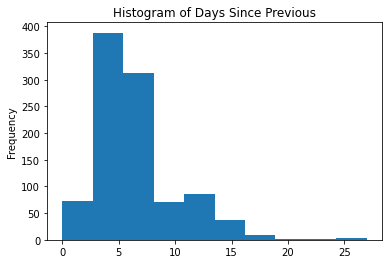

In [11]:
# plot pdays field to see distribution
bank_marketing_training['days_since_previous'].plot(kind='hist', title='Histogram of Days Since Previous')

In [12]:
# copy education to education_numeric field to replace strings with numeric values
bank_marketing_training['education_numeric'] = bank_marketing_training['education']

In [13]:
dict_edu = {
    'education_numeric': {
        'illiterate':0, 
        'basic.4y':4,
        'basic.6y':6,
        'basic.9y':9,
        'high.school':12,
        'professional.course':12,
        'university.degree':16,
        'unknown':np.NAN
    }
}

In [14]:
bank_marketing_training.replace(dict_edu, inplace=True)

In [15]:
from scipy import stats

In [16]:
# standardize the age variable
bank_marketing_training['age_z'] = stats.zscore(bank_marketing_training['age'])

In [17]:
bank_marketing_training.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,5,4.0,1.635778
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,312,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,6,6.0,-0.479588
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,195,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,7,9.0,-0.094976
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,38,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,8,12.0,-0.960353
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,9,12.0,1.443472


In [18]:
# save age outliers to new variable
bank_train_outliers = bank_marketing_training.query('age_z > 3 | age_z < -3')

In [19]:
# print listing of the 10 largest age_z values
bank_train_outliers['age_z'].sort_values(ascending=False).head(10)

24833    4.904980
24840    4.904980
26520    4.712674
26015    4.712674
18186    4.616521
18190    4.616521
18179    4.616521
18181    4.616521
26509    4.616521
18183    4.616521
Name: age_z, dtype: float64

In [20]:
bank_marketing_training_sort = bank_marketing_training.sort_values(['age_z'], ascending = False)

In [21]:
bank_marketing_training_sort[['age', 'marital']].head(15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
18179,88,divorced
18181,88,divorced
18183,88,divorced
18186,88,divorced
18187,88,divorced
18188,88,divorced


In [22]:
bank_marketing_training.job.value_counts()

admin.           6757
blue-collar      6051
technician       4437
services         2581
management       1889
retired          1143
self-employed     918
entrepreneur      914
housemaid         709
unemployed        667
student           598
unknown           210
Name: job, dtype: int64

In [23]:
# combine the jobs with less than 5% of the records into an 'other' field
unq_job = bank_marketing_training.job.unique().copy()
total = bank_marketing_training.job.count()
temp = {}
rjob = {}

for j in unq_job:
  job = bank_marketing_training.loc[bank_marketing_training.job == j].shape[0]
  p = job/total*100
  if p < 5:
    temp[j] = p
    rjob[j] = 'Other'
  else:
    continue

bank_marketing_training.job.replace(rjob, inplace=True)

In [24]:
bank_marketing_training.rename(columns={'default':'credit_default'}, inplace=True)

In [25]:
# replace months with numberic equivalent
mon_rep = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6, 
    'jul':7, 
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

bank_marketing_training.month.replace(mon_rep, inplace=True)

In [26]:
# keep month variable as categorical
bank_marketing_training.month = bank_marketing_training.month.astype('category')
bank_marketing_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  26874 non-null  int64   
 1   job                  26874 non-null  object  
 2   marital              26874 non-null  object  
 3   education            26874 non-null  object  
 4   credit_default       26874 non-null  object  
 5   housing              26874 non-null  object  
 6   loan                 26874 non-null  object  
 7   contact              26874 non-null  object  
 8   month                26874 non-null  category
 9   day_of_week          26874 non-null  object  
 10  duration             26874 non-null  int64   
 11  campaign             26874 non-null  int64   
 12  days_since_previous  982 non-null    float64 
 13  previous             26874 non-null  int64   
 14  previous_outcome     26874 non-null  object  
 15  emp.var.rate       

In [27]:
# standardize duration variable
bank_marketing_training['duration_z'] = bank_marketing_training['duration']
bank_marketing_training['duration_z'] = stats.zscore(bank_marketing_training['duration'])

In [28]:
bank_duration_outliers = bank_marketing_training.query('duration_z > 3 | duration_z < -3')
print(f'outliers: {bank_duration_outliers.shape[0]}')

outliers: 549


In [29]:
# identify the most extreme outlier
max(bank_duration_outliers['duration_z'])

17.99519758939772

In [30]:
bank_marketing_training['campaign_z'] = bank_marketing_training['campaign']
bank_marketing_training['campaign_z'] = stats.zscore(bank_marketing_training['campaign'])
bank_campaign_outliers = bank_marketing_training.query('campaign_z > 3 | campaign_z < -3')
print(f'outliers: {bank_campaign_outliers.shape[0]}')
print(f'most extremem outlier: {max(bank_campaign_outliers.campaign_z)}')

outliers: 548
most extremem outlier: 14.711334449748152
